In [1]:
#Load the data.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score,roc_curve,auc, make_scorer, confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline

data = pd.read_csv("creditcard.csv")

In [2]:
#Exploratory data analysis.
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.isnull().values.any()

False

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Normal transactions: 284315
Fraud transactions: 492


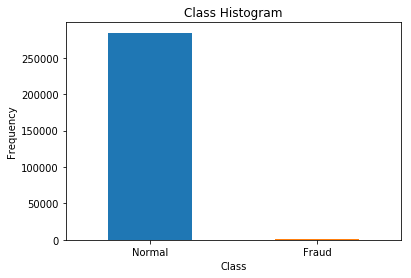

In [6]:
classesNo = pd.value_counts(data['Class'], sort = True)
classesNo.plot(kind = 'bar', rot=0)
plt.title("Class Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0,1],["Normal","Fraud"])
print('Normal transactions:', len(data[data.Class==0]))
print('Fraud transactions:', len(data[data.Class==1]))

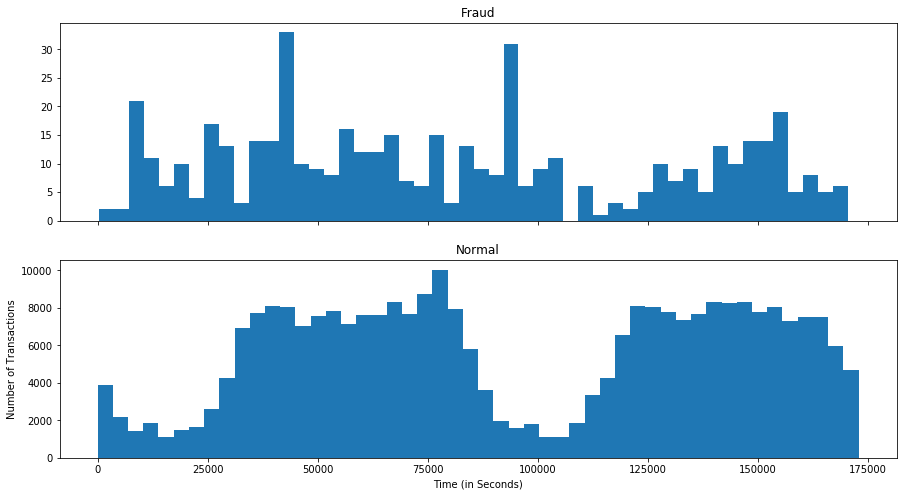

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))

bins = 50

ax1.hist(data.Time[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Time[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

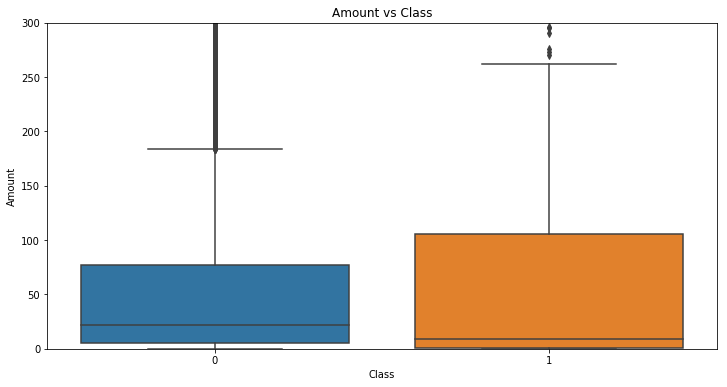

In [8]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x = 'Class', y = 'Amount', data = data)
ax.set_ylim([0, 300])
plt.title('Amount vs Class')
plt.show()

In [9]:
#Data preprocessing.
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [10]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [11]:
#Balance the data.

data = data.sample(frac=1)
n = data[data["Class"] == 0]
print(len(n))
f = data[data["Class"] == 1].sample(n=len(n), replace=True)
print(len(f))

# new_data = n.append(f)

n_data = pd.concat([f, n])

# Shuffle dataframe rows
new_data = n_data.sample(frac=1, random_state=42)

print('New data count:', len(new_data))
print('Normal transactions:', len(new_data[new_data.Class==0]))
print('Fraud transactions:', len(new_data[new_data.Class==1]))
new_data.head(10)

284315
284315
New data count: 568630
Normal transactions: 284315
Fraud transactions: 284315


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
14303,-1.067705,0.257185,1.786535,3.103298,-0.056472,0.832447,0.587668,0.158500,-1.166162,0.686452,...,-0.023379,0.177773,0.198885,0.032079,0.521436,0.376115,-0.007718,-0.052572,0.224454,0
128203,1.208803,0.087565,0.437992,0.639498,-0.247264,-0.173644,-0.059980,-0.025795,0.073493,-0.054956,...,-0.189007,-0.351813,-0.053839,0.075633,0.501237,0.268029,-0.020409,0.002017,-0.317207,0
255556,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,-4.128505,-3.963224,...,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,-0.350151,1
187552,2.166357,-1.435883,-1.312189,-2.795221,-0.860761,-0.198408,-0.998128,0.035170,1.500232,-0.378155,...,-0.089079,0.581453,-0.006690,0.238543,0.264841,-0.587965,0.084866,-0.051720,-0.296896,0
143641,-0.395559,1.038879,1.203863,-0.287007,0.598547,0.072363,0.667104,0.077780,-0.469565,-0.379650,...,-0.245927,-0.565452,-0.106731,-0.762627,-0.126516,0.150100,0.286289,0.110866,-0.342475,0
252774,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,-5.533443,...,0.532320,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,-0.350151,1
130262,1.336896,-0.511809,0.304365,-0.703888,-1.002049,-0.963943,-0.453131,-0.149748,-1.148255,0.822713,...,0.285440,0.678203,-0.113526,0.579761,0.562695,-0.148240,-0.013704,0.005042,-0.242083,0
92088,-0.952231,1.093847,1.083693,-0.270444,0.119938,-0.958169,0.388844,0.389950,-0.711154,-1.190806,...,-0.054060,-0.365140,0.127090,0.361368,-0.623170,-0.120469,-0.006019,0.067702,-0.345313,0
191359,1.177824,2.487103,-5.330608,5.324547,1.150243,-1.281843,-1.171994,0.413778,-2.659840,-2.971695,...,0.262325,-0.431790,-0.092088,0.145216,0.457788,0.167739,0.451243,0.268421,-0.333759,1
233601,2.067506,0.055051,-1.896548,0.192777,0.658051,-0.293175,0.031220,-0.024797,0.356629,-0.190934,...,-0.352084,-0.969143,0.275256,-0.019518,-0.243083,0.186320,-0.070828,-0.046960,-0.349671,0


In [12]:
# Split the dataset into training and testing sets.
X = data.drop('Class', axis=1)
Y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0, shuffle=True)

# Split the balanced dataset into training and testing sets.
X_Balanced = new_data.drop('Class', axis=1)
Y_Balanced = new_data['Class']
XB_train, XB_test, yB_train, yB_test = train_test_split(X_Balanced,Y_Balanced,test_size = 0.3, random_state = 0, shuffle=True)

In [15]:
#Building Different Models, to evaluate and select the best one using class weigh=balanced.

#First get each models best parameters.

#Decision Tree.
dt_classifier = DecisionTreeClassifier()  

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(2,6,1)),
    "min_samples_leaf": list(range(5,9,1)),
    'class_weight' : ['balanced', None]
    }

dt_classifier_gs = GridSearchCV(estimator = dt_classifier, param_grid = param_grid , scoring =make_scorer(average_precision_score), n_jobs=-1)
dt_classifier_gs.fit(X_train, y_train)
best_parameters = dt_classifier_gs.best_params_
print('Decision tree best parameters are: ', best_parameters)

#logistic Regression.
log_classifier = LogisticRegression()
param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10, 100]
            }

log_classifier_gs = GridSearchCV(estimator = log_classifier, param_grid = param_grid , scoring = make_scorer(average_precision_score), verbose = 1, n_jobs = -1)
log_classifier_gs.fit(X_train, y_train)

best_parameters = log_classifier_gs.best_params_
print('logistic regression best parameters are: ', best_parameters)

# #Random Forest.
# rf_classifier = RandomForestClassifier()
# param_grid = {
#     'max_depth': [5, 10, 15],
#     'max_features': ['sqrt'],
#     'min_samples_leaf': [10, 20],
#     'min_samples_split': [2, 5],
#     'n_estimators': [500, 700],
#     'class_weight' : ['balanced', None]
#     }

# rf_classifier_gs = GridSearchCV(estimator = rf_classifier, param_grid = param_grid , scoring = 'recall', n_jobs=-1)
# rf_classifier_gs.fit(X_train, y_train)
# best_parameters = rf_classifier_gs.best_estimator_
# print('Random Forest best parameters are: ', best_parameters)

Decision tree best parameters are:  {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8}
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 11.3min finished


logistic regression best parameters are:  {'C': 10, 'class_weight': None, 'penalty': 'l1'}


In [36]:
from sklearn.metrics import classification_report

#desicion tree score.
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=8)

dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85294
          1       0.89      0.72      0.80       149

avg / total       1.00      1.00      1.00     85443



In [21]:
#logistic regression score.
log_classifier = LogisticRegression(C= 10, penalty= 'l1')
log_classifier.fit(X_train, y_train)
y_pred = log_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85294
          1       0.89      0.62      0.73       149

avg / total       1.00      1.00      1.00     85443



In [19]:
#Building Different Models, to evaluate and select the best one after balancing the dataset.

#First get each models best parameters.

#Decision Tree.
dt_classifier = DecisionTreeClassifier()  

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(2,6,1)),
    "min_samples_leaf": list(range(5,9,1)),
    'class_weight' : ['balanced', None]
    }

dt_classifier_gs = GridSearchCV(estimator = dt_classifier, param_grid = param_grid ,  scoring =make_scorer(average_precision_score), n_jobs=-1)
dt_classifier_gs.fit(XB_train, yB_train)
best_parameters = dt_classifier_gs.best_params_
print('Decision tree best parameters are: ', best_parameters)

#logistic Regression.
log_classifier = LogisticRegression()
param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10, 100]
            }

log_classifier_gs = GridSearchCV(estimator = log_classifier, param_grid = param_grid , scoring =make_scorer(average_precision_score), verbose = 1, n_jobs = -1)
log_classifier_gs.fit(XB_train, yB_train)

best_parameters = log_classifier_gs.best_params_
print('logistic regression best parameters are: ', best_parameters)

# #Random Forest.
# rf_classifier = RandomForestClassifier()
# param_grid = {
#     'max_depth': [5, 10, 15],
#     'max_features': ['sqrt'],
#     'min_samples_leaf': [10, 20],
#     'min_samples_split': [2, 5],
#     'n_estimators': [500, 700],
#     'class_weight' : ['balanced', None]
#     }

# rf_classifier_gs = GridSearchCV(estimator = rf_classifier, param_grid = param_grid , scoring = 'recall', n_jobs=-1)
# rf_classifier_gs.fit(XB_train, yB_train)
# best_parameters = rf_classifier_gs.best_estimator_
# print('Random Forest best parameters are: ', best_parameters)

Decision tree best parameters are:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6}
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 11.4min finished


logistic regression best parameters are:  {'C': 0.1, 'class_weight': None, 'penalty': 'l1'}


In [43]:
#desicion tree score.
from sklearn.metrics import precision_score, recall_score
dt_classifier = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,min_samples_leaf=6)

dt_classifier.fit(XB_train, yB_train)
yB_pred = dt_classifier.predict(XB_test)
print(classification_report(yB_test, yB_pred))


precision = precision_score(yB_test, yB_pred)
recall = recall_score(yB_test, yB_pred)
average_precision = average_precision_score(yB_test, yB_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
print('Precision score: {0:0.2f}'.format( precision))
print('Recall score: {0:0.2f}'.format( recall))


             precision    recall  f1-score   support

          0       0.96      0.98      0.97     85264
          1       0.98      0.95      0.97     85325

avg / total       0.97      0.97      0.97    170589

Average precision-recall score: 0.95
Precision score: 0.98
Recall score: 0.95


In [25]:
#logistic regression score.
log_classifier = LogisticRegression(C=.1,  penalty='l1')

log_classifier.fit(XB_train, yB_train)
yB_pred = log_classifier.predict(XB_test)
print(classification_report(yB_test, yB_pred))

precision = precision_score(yB_test, yB_pred)
recall = recall_score(yB_test, yB_pred)
average_precision = average_precision_score(yB_test, yB_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
print('Precision score: {0:0.2f}'.format(precision))
print('Recall score: {0:0.2f}'.format(recall))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95     85264
          1       0.98      0.92      0.95     85325

avg / total       0.95      0.95      0.95    170589

Average precision-recall score: 0.94
Precision score: 0.98
Recall score: 0.92


In [40]:
#confusion matrix for imbalanced data using Desicion tree.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        pass
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

Recall metric in the test dataset:  0.954022853794
Accuracy:  0.965478430614


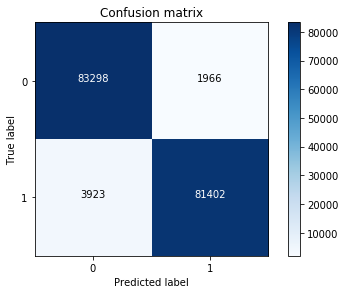

In [38]:
#confusion matrix for balanced data using decision tree.
    
cnf_matrix = confusion_matrix(yB_test, yB_pred)
np.set_printoptions(precision=2)

print("Recall metric in the test dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Accuracy: ",(cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[0,0] + cnf_matrix[0,1]+cnf_matrix[1,0] + cnf_matrix[1,1]))

class_names = [0,1]

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


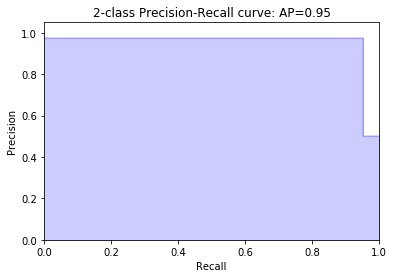

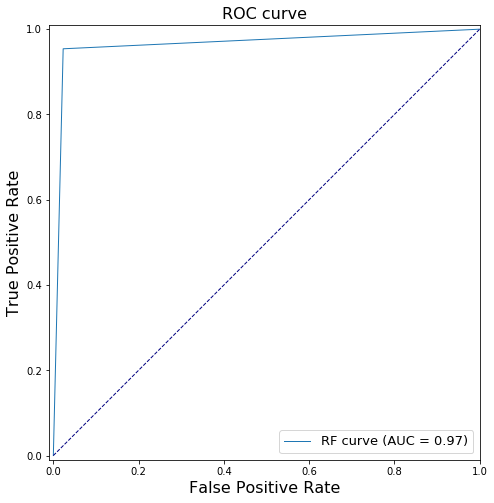

In [39]:
average_precision = average_precision_score(yB_test, yB_pred)
precision, recall, _ = precision_recall_curve(yB_test, yB_pred)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(yB_test, yB_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()